# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow/pytorch operations and basic numpy operations are allowed**


In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Image Size is (534, 800)


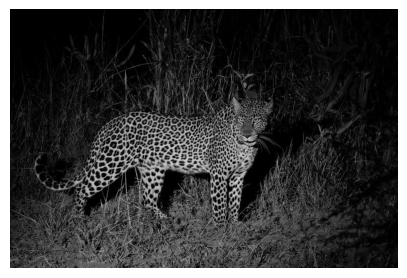

In [11]:
img0 = cv.imread('41300ff6-a177-4198-8185-7ed1a7a08314.jpeg')
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
print('Image Size is {}'.format(img.shape))
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [12]:
img.dtype

dtype('uint8')

#Q1) a) Downsample the image by factor of 2 using numpy operation. [1 Marks]
#b) Print size of the Downsample image and store it as $inp\_img1$ [1 Marks]  

In [13]:
downsampled_img=img[::2,::2]

Downloaded Image size: (267, 400)


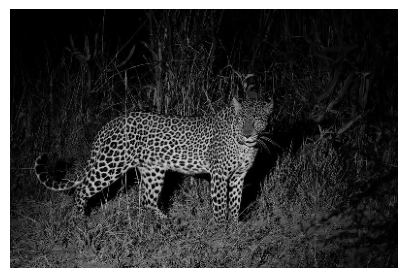

In [14]:
inp_image1=downsampled_img
print('Downloaded Image size:', inp_image1.shape)
plt.figure(figsize=(5,5))
plt.imshow(inp_image1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#Q2) Write a function $Interp(inp\_img1, scale)$ to implement Bilinear Interpolation using numpy operations. This function will take matrix as input and increase the scale of the image by $scale$-times[3 Marks]

In [15]:
def Interp(inp_img, scale):

    print(inp_img.shape)


    a, b = inp_img.shape
    new_a, new_b = int(a * scale), int(b * scale)
    out_img = np.zeros((new_a, new_b))
    
    for i in range(new_a):
        for j in range(new_b):
            # Mapping with original image using scale
            p = i / scale
            q = j / scale
            p0, q0 = int(p), int(q)
            p1, q1 = min(p0 + 1, a - 1), min(q0 + 1, b - 1)
            
            #Weighing the values with the difference
            wx = p - p0
            wy = q - q0
            
            # Compute result of interpolation
            out_img[i, j] = (1 - wx) * (1 - wy) * inp_img[p0, q0] + \
                            wx * (1 - wy) * inp_img[p1, q0] + \
                            (1 - wx) * wy * inp_img[p0, q1] + \
                            wx * wy * inp_img[p1, q1]
    
    return out_img


#Q3) Apply $Interp(.,.)$ with $scale = 2$ on input image. [2 Marks]
#Store output image in $out\_img1$

#Show input image and output images.

(267, 400)


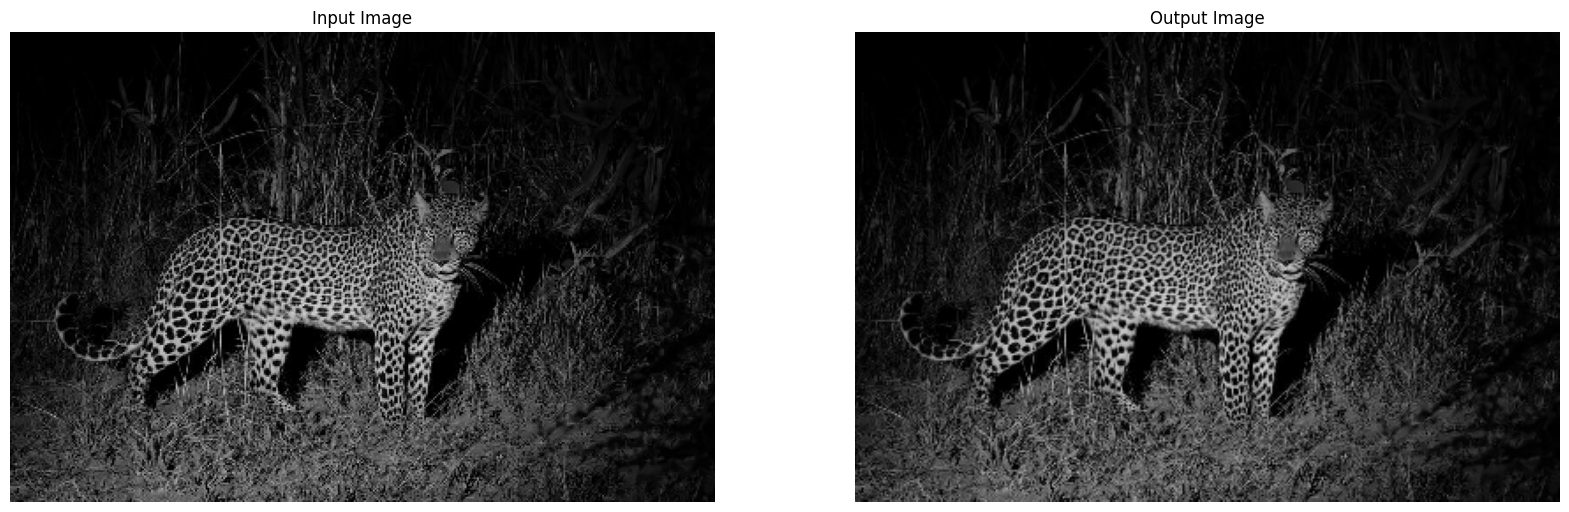

"plt.figure(figsize=(20,20))\nplt.subplot(121)\nplt.imshow(img, cmap='gray', vmin=0, vmax=255)\nplt.axis('off')\nplt.subplot(122)\nplt.imshow(out_image1, cmap='gray', vmin=0, vmax=255)\nplt.axis('off')\nplt.show()"

In [16]:
scale_factor = 2  # Example scale factor
out_image1 = Interp(inp_image1, scale_factor) #using the interpolation function defined

# Plot original and output images
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(inp_image1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Input Image")
"""printing input image"""

plt.subplot(122)
plt.imshow(out_image1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Output Image")
plt.show()
'''printing output image'''


#repeated printing of both input and output images as given in source code
'''plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(out_image1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()'''

#Q3) Calculate element-wise mean squared error between $img$ and $out\_img1$ [3 Marks]
[Hint: you will recieve an error related to matrix shape. Add column of zeros to mitigate that error]

In [17]:
#adding columns of zeroes as specified
if out_image1.shape[1] < img.shape[1]:
    zeros = np.zeros((out_image1.shape[0], img.shape[1] - out_image1.shape[1]))
    out_image1 = np.hstack((out_image1, zeros))

if out_image1.shape[0] < img.shape[0]:
    zeros = np.zeros((img.shape[0] - out_image1.shape[0], out_image1.shape[1]))
    out_image1 = np.vstack((out_image1, zeros))

# Compute Mean Squared Error (MSE)
mse = np.mean((img - out_image1) ** 2)
print('Mean Squared Error:', mse)

Mean Squared Error: 235.483046875
